# Play the game

In [1]:
# Let's make sure we have the right library
!pip install pygame

In [2]:
# and that we are in the right kernel
import sys
print(sys.executable)

/anaconda/envs/azureml_py38/bin/python


## 2) Play the game, with user interaction
We will capture the first moment when the ball starts the trip down, and input our movement decision, inmediately after the game prints in the user did OK.
Of course, since you can see the begining, you can always pick the right direction, but enhance of this cell can allow to input a robot decision

### Let's now clean the images:

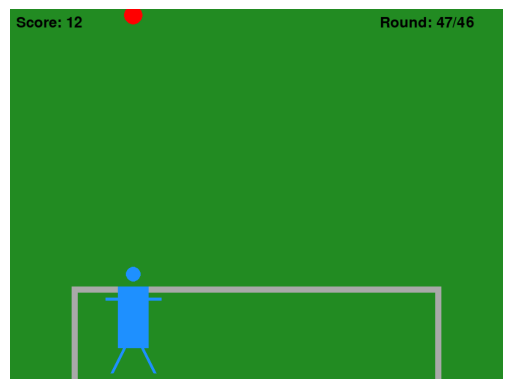

Final Score: 12/46


In [4]:
import os
import pygame
import random
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Disable sound to avoid issues in non-graphical environments
os.environ["SDL_AUDIODRIVER"] = "dummy"
pygame.mixer.init()

# Initialize Pygame
pygame.init()

# Screen dimensions
WIDTH, HEIGHT = 800, 600
screen = pygame.Surface((WIDTH, HEIGHT))  # Off-screen surface
pygame.display.set_caption("Goalkeeper Challenge")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (34, 139, 34)
RED = (255, 0, 0)
BLUE = (30, 144, 255)
GRAY = (169, 169, 169)

# Goalkeeper properties
goalkeeper_width, goalkeeper_height = 50, 100
goalkeeper_y = HEIGHT - goalkeeper_height - 50

# Ball properties
ball_radius = 15
ball_positions = ["left", "middle", "right"]
ball_x_positions = {"left": WIDTH // 4, "middle": WIDTH // 2, "right": 3 * WIDTH // 4}
ball_y = 50
ball_speed = 10  # Increased speed
ball_direction = 1  # 1 for down, -1 for up

# Font
font = pygame.font.Font(None, 36)

# Game variables
clock = pygame.time.Clock()
running = True
score = 0
num_rounds = 46
current_round = 0
goalkeeper_position = "middle"
goalkeeper_x = WIDTH // 2 - (goalkeeper_width // 2)

# Function to read moves from a file
def read_moves_from_file(file_path):
    moves = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    ball_pos_index = int(parts[0]) - 1  # Adjusting to zero-based index
                    ball_pos = ball_positions[ball_pos_index]  # Convert number to position
                    move_direction = parts[1]
                    if move_direction in ball_positions:
                        moves.append((ball_pos, move_direction))
                except (ValueError, IndexError):
                    print(f"Skipping invalid line in file: {line.strip()}")
    return moves

# Load the moves from the file
moves = read_moves_from_file("goalkeeper_moves.txt")
current_move_index = 0

# Initial game speed (FPS)
game_speed = 30

def draw_goal():
    pygame.draw.rect(screen, GRAY, (WIDTH // 8, HEIGHT - 150, WIDTH - WIDTH // 4, 10))  # goal post
    pygame.draw.rect(screen, GRAY, (WIDTH // 8, HEIGHT - 150, 10, 150))  # left post
    pygame.draw.rect(screen, GRAY, (WIDTH - WIDTH // 8 - 10, HEIGHT - 150, 10, 150))  # right post

def draw_goalkeeper(x, y):
    # Draw the head
    pygame.draw.circle(screen, BLUE, (x + goalkeeper_width // 2, y - 20), goalkeeper_width // 4)
    # Draw the body
    pygame.draw.rect(screen, BLUE, (x, y, goalkeeper_width, goalkeeper_height))
    # Draw the arms
    pygame.draw.line(screen, BLUE, (x - 20, y + 20), (x + goalkeeper_width + 20, y + 20), 5)
    # Draw the legs
    pygame.draw.line(screen, BLUE, (x + 10, y + goalkeeper_height), (x - 10, y + goalkeeper_height + 40), 5)
    pygame.draw.line(screen, BLUE, (x + goalkeeper_width - 10, y + goalkeeper_height), (x + goalkeeper_width + 10, y + goalkeeper_height + 40), 5)

def draw_field():
    pygame.draw.rect(screen, GREEN, (0, 0, WIDTH, HEIGHT))  # Green field background

def save_screenshot_as_matplotlib_image():
    """Capture the Pygame screen and convert it to a Matplotlib image for display."""
    img_str = pygame.image.tostring(screen, "RGB")
    img = pygame.image.fromstring(img_str, (WIDTH, HEIGHT), "RGB")
    plt.imshow(pygame.surfarray.array3d(img).swapaxes(0, 1))
    plt.axis('off')
    clear_output(wait=True)
    plt.show()

# Main game loop
while running and current_round < num_rounds:
    draw_field()  # Draw the field background
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                game_speed += 5  # Increase speed
            elif event.key == pygame.K_DOWN:
                game_speed = max(5, game_speed - 5)  # Decrease speed, minimum speed is 5

    # Use the current move from the file
    if current_move_index < len(moves):
        ball_position, move_direction = moves[current_move_index]
        goalkeeper_position = move_direction
        goalkeeper_x = ball_x_positions[goalkeeper_position] - (goalkeeper_width // 2)

    # Move the ball
    ball_y += ball_speed * ball_direction
    
    # Draw goal post
    draw_goal()

    # Draw ball
    pygame.draw.circle(screen, RED, (ball_x_positions[ball_position], ball_y), ball_radius)
    
    # Draw goalkeeper
    draw_goalkeeper(goalkeeper_x, goalkeeper_y)
    
    # Check if goalkeeper catches the ball
    if ball_direction == 1 and ball_y >= goalkeeper_y - ball_radius:
        if goalkeeper_position == ball_position:
            print("Goalkeeper caught the ball!")
            score += 1
            ball_direction = -1  # Bounce the ball back up
        else:
            print("Goalkeeper missed the ball.")
            # Prepare for next round
            ball_y = 50
            ball_direction = 1
            current_round += 1
            current_move_index += 1

    if ball_direction == -1 and ball_y <= ball_radius:
        # Ball has bounced back to the top, reset for next round
        ball_y = 50
        ball_direction = 1
        current_round += 1
        current_move_index += 1

    # Display score and rounds
    score_text = font.render(f"Score: {score}", True, BLACK)
    screen.blit(score_text, (10, 10))
    round_text = font.render(f"Round: {current_round + 1}/{num_rounds}", True, BLACK)
    screen.blit(round_text, (WIDTH - 200, 10))
    
    # Display the screen using Matplotlib
    save_screenshot_as_matplotlib_image()
    clock.tick(game_speed)

pygame.quit()

print(f"Final Score: {score}/{num_rounds}")

In [5]:
import pygame
import random

# Initialize Pygame
pygame.init()

# Screen dimensions
WIDTH, HEIGHT = 800, 600
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Goalkeeper Challenge")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (34, 139, 34)
RED = (255, 0, 0)
BLUE = (30, 144, 255)
GRAY = (169, 169, 169)

# Goalkeeper properties
goalkeeper_width, goalkeeper_height = 50, 100
goalkeeper_y = HEIGHT - goalkeeper_height - 50

# Ball properties
ball_radius = 15
ball_positions = ["left", "middle", "right"]
ball_x_positions = {"left": WIDTH // 4, "middle": WIDTH // 2, "right": 3 * WIDTH // 4}
ball_y = 50
ball_speed = 10  # Increased speed
ball_direction = 1  # 1 for down, -1 for up

# Font
font = pygame.font.Font(None, 36)

# Game variables
clock = pygame.time.Clock()
running = True
score = 0
num_rounds = 46
current_round = 0
goalkeeper_position = "middle"
goalkeeper_x = WIDTH // 2 - (goalkeeper_width // 2)

# Function to read moves from a file
def read_moves_from_file(file_path):
    moves = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                try:
                    ball_pos_index = int(parts[0]) - 1  # Adjusting to zero-based index
                    ball_pos = ball_positions[ball_pos_index]  # Convert number to position
                    move_direction = parts[1]
                    if move_direction in ball_positions:
                        moves.append((ball_pos, move_direction))
                except (ValueError, IndexError):
                    print(f"Skipping invalid line in file: {line.strip()}")
    return moves

# Load the moves from the file
moves = read_moves_from_file("goalkeeper_moves.txt")
current_move_index = 0

# Initial game speed (FPS)
game_speed = 30

def draw_goal():
    pygame.draw.rect(screen, GRAY, (WIDTH // 8, HEIGHT - 150, WIDTH - WIDTH // 4, 10))  # goal post
    pygame.draw.rect(screen, GRAY, (WIDTH // 8, HEIGHT - 150, 10, 150))  # left post
    pygame.draw.rect(screen, GRAY, (WIDTH - WIDTH // 8 - 10, HEIGHT - 150, 10, 150))  # right post

def draw_goalkeeper(x, y):
    # Draw the head
    pygame.draw.circle(screen, BLUE, (x + goalkeeper_width // 2, y - 20), goalkeeper_width // 4)
    # Draw the body
    pygame.draw.rect(screen, BLUE, (x, y, goalkeeper_width, goalkeeper_height))
    # Draw the arms
    pygame.draw.line(screen, BLUE, (x - 20, y + 20), (x + goalkeeper_width + 20, y + 20), 5)
    # Draw the legs
    pygame.draw.line(screen, BLUE, (x + 10, y + goalkeeper_height), (x - 10, y + goalkeeper_height + 40), 5)
    pygame.draw.line(screen, BLUE, (x + goalkeeper_width - 10, y + goalkeeper_height), (x + goalkeeper_width + 10, y + goalkeeper_height + 40), 5)

def draw_field():
    pygame.draw.rect(screen, GREEN, (0, 0, WIDTH, HEIGHT))  # Green field background

# Main game loop
while running and current_round < num_rounds:
    draw_field()  # Draw the field background
    
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_UP:
                game_speed += 5  # Increase speed
            elif event.key == pygame.K_DOWN:
                game_speed = max(5, game_speed - 5)  # Decrease speed, minimum speed is 5

    # Use the current move from the file
    if current_move_index < len(moves):
        ball_position, move_direction = moves[current_move_index]
        goalkeeper_position = move_direction
        goalkeeper_x = ball_x_positions[goalkeeper_position] - (goalkeeper_width // 2)

    # Move the ball
    ball_y += ball_speed * ball_direction
    
    # Draw goal post
    draw_goal()

    # Draw ball
    pygame.draw.circle(screen, RED, (ball_x_positions[ball_position], ball_y), ball_radius)
    
    # Draw goalkeeper
    draw_goalkeeper(goalkeeper_x, goalkeeper_y)
    
    # Check if goalkeeper catches the ball
    if ball_direction == 1 and ball_y >= goalkeeper_y - ball_radius:
        if goalkeeper_position == ball_position:
            print("Goalkeeper caught the ball!")
            score += 1
            ball_direction = -1  # Bounce the ball back up
        else:
            print("Goalkeeper missed the ball.")
            # Prepare for next round
            ball_y = 50
            ball_direction = 1
            current_round += 1
            current_move_index += 1

    if ball_direction == -1 and ball_y <= ball_radius:
        # Ball has bounced back to the top, reset for next round
        ball_y = 50
        ball_direction = 1
        current_round += 1
        current_move_index += 1

    # Display score and rounds
    score_text = font.render(f"Score: {score}", True, BLACK)
    screen.blit(score_text, (10, 10))
    round_text = font.render(f"Round: {current_round + 1}/{num_rounds}", True, BLACK)
    screen.blit(round_text, (WIDTH - 200, 10))
    
    pygame.display.flip()
    clock.tick(game_speed)

pygame.quit()

print(f"Final Score: {score}/{num_rounds}")

Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper missed the ball.
Goalkeeper caught the ball!
Goalkeeper caught th

In [6]:
import os
import glob

# Find all PNG files that match the pattern "round_*.png"
png_files = glob.glob("round_*.png")

# Loop through and remove each file
for file in png_files:
    os.remove(file)
    print(f"Deleted {file}")

print("All round screenshots have been removed.")


Deleted round_1.png
Deleted round_2.png
Deleted round_3.png
Deleted round_4.png
Deleted round_5.png
All round screenshots have been removed.
